In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# for modeling 
import sklearn
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import missingno as msno
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


We want you to set the 'RainToday' variable as the dependent variable and set up a model that predicts whether there will be rain or not. 
This model will be made using;

- 'Desicion Tree',
- 'Random Forest',
- 'LightGBM',
- 'GBM',
- 'XGBoost',
- 'CatBoost' models.

## DATA READING AND EXPLORING

In [104]:
d = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
df = d.copy()
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
pd.DataFrame({"No. of unique values": list(df.nunique())}, index=df.columns)

,No. of unique values
Date,3436
Location,49
MinTemp,389
MaxTemp,505
Rainfall,681
Evaporation,358
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16


In [7]:
df.duplicated().sum()

0

In [8]:
y = len(df[df['RainToday'] == 'Yes'])
n = len(df[df['RainToday'] == 'No'])
print(y,n)

31880 110319


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [10]:
df.corr() #I can see from here which variables I can put into the model
          #For example, the variables can be removed by looking at the order of importance.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


## SOME OF VISUALIZATION

<AxesSubplot:>

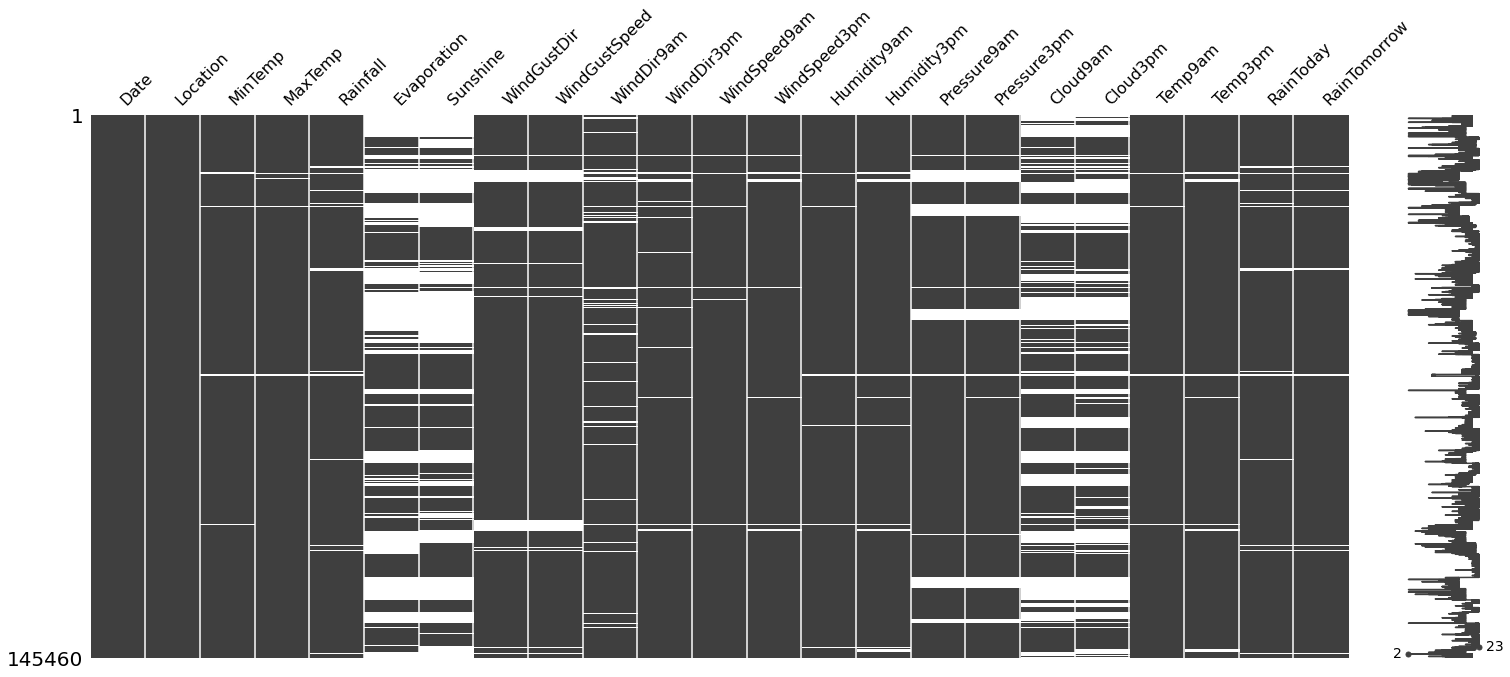

In [11]:
#VISUALIZATION OF NAN  VALUES
msno.matrix(df)

In [12]:
#drop missing values in the RainToday and RainTomorrow
df.dropna(subset=['RainToday', 'RainTomorrow'],axis=0,inplace=True)

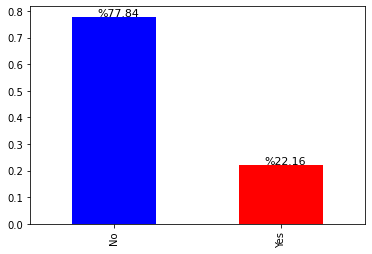

In [13]:
ax = df['RainTomorrow'].value_counts(normalize=True).plot.bar(color=["blue", "red"])
def labels(ax):
    for p in ax.patches:
        ax.annotate(f"%{p.get_height()*100:.2f}", (p.get_x() + 0.15, p.get_height() * 1.005),size=11)
labels(ax)

In [14]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,73982,146,66805,0.0,14.5
Evaporation,float64,81093,356,59694,0.0,145.0
Cloud3pm,float64,84693,11,56094,0.0,9.0
Cloud9am,float64,88162,11,52625,0.0,9.0
Pressure3pm,float64,127018,549,13769,977.1,1039.6
Pressure9am,float64,127044,546,13743,980.5,1041.0
WindDir9am,object,131127,17,9660,NaN,NaN
WindGustDir,object,131624,17,9163,NaN,NaN
WindGustSpeed,float64,131682,68,9105,6.0,135.0
WindDir3pm,object,137117,17,3670,NaN,NaN


__________Data Types__________

float64    16
object      7
Name: Types, dtype: int64


In [15]:
#label encoding for univariate variables
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
df["RainToday_label"] = lbe.fit_transform(df["RainToday"])
df["RainTomorrow_label"] = lbe.fit_transform(df["RainTomorrow"])

In [16]:
# one-hot encoding for variables with more than 2 categories

#drop variables with so many countries for the sake of time and memory consumption
df.drop(['Date','Location','WindDir9am','WindDir3pm','WindGustDir'], axis=1, inplace=True) 

# df = pd.get_dummies(df, drop_first=True, columns = ['WindGustDir'], prefix = ['WindGustDir'])

In [17]:
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,73982,146,66805,0.0,14.5
Evaporation,float64,81093,356,59694,0.0,145.0
Cloud3pm,float64,84693,11,56094,0.0,9.0
Cloud9am,float64,88162,11,52625,0.0,9.0
Pressure3pm,float64,127018,549,13769,977.1,1039.6
Pressure9am,float64,127044,546,13743,980.5,1041.0
WindGustSpeed,float64,131682,68,9105,6.0,135.0
Humidity3pm,float64,137286,102,3501,0.0,100.0
Temp3pm,float64,138163,501,2624,-5.4,46.7
WindSpeed3pm,float64,138256,45,2531,0.0,87.0


__________Data Types__________

float64    16
int64       2
object      2
Name: Types, dtype: int64


In [18]:
# DecisionTreeRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

#drop unnecessary columns and date columns
df_imputation = df.drop(['RainToday','RainTomorrow'], axis=1) 

#define variables to keep the index and the columns
index = df_imputation.index
columns = df_imputation.columns

#imputation steps
imp_tree = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())
imp_tree.fit(df_imputation)
df_imputed = imp_tree.transform(df_imputation)

#transform imputed data in array format to dataframe
df_imputed_tree = pd.DataFrame(df_imputed, index=index, columns=columns)

df_imputed_tree.isnull().sum()

MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
dtype: int64

In [19]:
df_imputed_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MinTemp             140787 non-null  float64
 1   MaxTemp             140787 non-null  float64
 2   Rainfall            140787 non-null  float64
 3   Evaporation         140787 non-null  float64
 4   Sunshine            140787 non-null  float64
 5   WindGustSpeed       140787 non-null  float64
 6   WindSpeed9am        140787 non-null  float64
 7   WindSpeed3pm        140787 non-null  float64
 8   Humidity9am         140787 non-null  float64
 9   Humidity3pm         140787 non-null  float64
 10  Pressure9am         140787 non-null  float64
 11  Pressure3pm         140787 non-null  float64
 12  Cloud9am            140787 non-null  float64
 13  Cloud3pm            140787 non-null  float64
 14  Temp9am             140787 non-null  float64
 15  Temp3pm             140787 non-nul

## 1-Decision Tree Classifier

In [20]:
df2 = df_imputed_tree.copy()
x_dat = df2.drop(['RainTomorrow_label'],axis=1)
y = df2["RainTomorrow_label"].values

In [21]:
#If there is a outlier values, it must be done before coming here
X=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [23]:
dtc = DecisionTreeClassifier()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

cart_model = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [25]:
dtc_score=accuracy_score(y_test,y_pred)
dtc_score

0.7887870824158912

In [26]:
c_dtc=confusion_matrix(y_test,y_pred)
c_dtc

array([[28206,  4614],
       [ 4307,  5110]])

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86     32820
         1.0       0.53      0.54      0.53      9417

    accuracy                           0.79     42237
   macro avg       0.70      0.70      0.70     42237
weighted avg       0.79      0.79      0.79     42237



## Decision Tree Model tuning

In [28]:
tree_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [30]:
tree1 = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree1, tree_grid, cv = 10, n_jobs = -1, verbose = 2)
tree_cv_model = tree_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 10.5min finished


In [31]:
print("Best Parameters: " + str(tree_cv_model.best_params_))

Best Parameters: {'max_depth': 8, 'min_samples_split': 49}


In [33]:
tree1 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 23)
tree_tuned1 = tree1.fit(X_train, y_train)

In [34]:
y_pred = tree_tuned1.predict(X_test)
dtc_finalscore=accuracy_score(y_test, y_pred)
dtc_finalscore

0.8401164855458484

In [35]:
c_dtc2=confusion_matrix(y_test,y_pred)
c_dtc2

array([[31364,  1456],
       [ 5297,  4120]])

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90     32820
         1.0       0.74      0.44      0.55      9417

    accuracy                           0.84     42237
   macro avg       0.80      0.70      0.73     42237
weighted avg       0.83      0.84      0.82     42237



## 2-Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
y_pred = rf_model.predict(X_test)

In [76]:
rf_score=accuracy_score(y_test,y_pred)
rf_score

0.8566422804649951

In [77]:
c_rf=confusion_matrix(y_test,y_pred)
c_rf

array([[31339,  1481],
       [ 4574,  4843]])

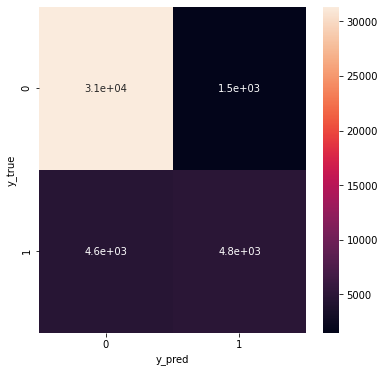

In [78]:
y_true=y_test
y_pred=rf_model.predict(X_test)
cmlr=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmlr, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     32820
         1.0       0.77      0.51      0.62      9417

    accuracy                           0.86     42237
   macro avg       0.82      0.73      0.76     42237
weighted avg       0.85      0.86      0.85     42237



## 3-LightGBM

In [57]:
from lightgbm import LGBMClassifier

In [58]:
# lgb = LGBMClassifier()

In [60]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [61]:
y_pred = lgbm_model.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred)

0.856713308236854

## Model Tuning of LightGBM

In [63]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [64]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 4,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 10)
lgbm_tuned = lgbm.fit(X_train,y_train)

In [65]:
y_pred = lgbm_tuned.predict(X_test)
lgbm_finalscore=accuracy_score(y_test, y_pred)
lgbm_finalscore

0.858086511826124

In [66]:
c_lgbm=confusion_matrix(y_test,y_pred)
c_lgbm

array([[31181,  1639],
       [ 4355,  5062]])

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     32820
         1.0       0.76      0.54      0.63      9417

    accuracy                           0.86     42237
   macro avg       0.82      0.74      0.77     42237
weighted avg       0.85      0.86      0.85     42237



## 4-Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [40]:
y_pred = gbm_model.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.8510310864881502

## Model Tuning of GBM

In [42]:
gbm = GradientBoostingClassifier(learning_rate = 0.05, 
                                 max_depth = 10,
                                min_samples_split = 10,
                                n_estimators = 100)

In [43]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [44]:
y_pred = gbm_tuned.predict(X_test)
gbm_finalscore=accuracy_score(y_test,y_pred)
gbm_finalscore

0.8581575395979828

In [45]:
c_gbm=confusion_matrix(y_test,y_pred)
c_gbm

array([[31145,  1675],
       [ 4316,  5101]])

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     32820
         1.0       0.75      0.54      0.63      9417

    accuracy                           0.86     42237
   macro avg       0.82      0.75      0.77     42237
weighted avg       0.85      0.86      0.85     42237



## 5-XGBOOST

In [48]:
!pip install xgboost

In [49]:
from xgboost import XGBClassifier

In [51]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[07:51:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
y_pred = xgb_model.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.8560977342140778

## Model Tuning of XGBoost

In [54]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    n_estimators = 100,
                    subsample = 0.8)
xgb_tuned =  xgb.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
XGBoost_finalscore=accuracy_score(y_test, y_pred)
XGBoost_finalscore

[07:53:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8487581977886687

In [55]:
c_xgb=confusion_matrix(y_test,y_pred)
c_xgb

array([[31400,  1420],
       [ 4968,  4449]])

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     32820
         1.0       0.76      0.47      0.58      9417

    accuracy                           0.85     42237
   macro avg       0.81      0.71      0.74     42237
weighted avg       0.84      0.85      0.84     42237



In [83]:
rf_model.predict(X_test)[0:10] # ilk 10 datatestdeki tahminler.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [84]:
rf_model.predict_proba(X_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari.

array([[0.81, 0.19],
       [0.66, 0.34],
       [0.97, 0.03],
       [0.92, 0.08],
       [0.89, 0.11],
       [0.82, 0.18],
       [0.53, 0.47],
       [0.79, 0.21],
       [0.93, 0.07],
       [1.  , 0.  ]])

n_estimators= 1 --> Accuracy: 78.6750952955939 %
n_estimators= 2 --> Accuracy: 81.92343206193623 %
n_estimators= 3 --> Accuracy: 82.13651537751261 %
n_estimators= 4 --> Accuracy: 83.38897175462272 %
n_estimators= 5 --> Accuracy: 83.471837488458 %
n_estimators= 6 --> Accuracy: 83.90037171200606 %
n_estimators= 7 --> Accuracy: 83.9571939294931 %
n_estimators= 8 --> Accuracy: 84.29102445722944 %
n_estimators= 9 --> Accuracy: 84.38336056064588 %
n_estimators= 10 --> Accuracy: 84.62722257736108 %
n_estimators= 11 --> Accuracy: 84.70772071880106 %
n_estimators= 12 --> Accuracy: 84.80479200700807 %
n_estimators= 13 --> Accuracy: 84.80479200700807 %
n_estimators= 14 --> Accuracy: 84.86161422449511 %
n_estimators= 15 --> Accuracy: 84.87581977886687 %
n_estimators= 16 --> Accuracy: 84.95395032791154 %
n_estimators= 17 --> Accuracy: 84.9728910670739 %
n_estimators= 18 --> Accuracy: 84.92790681156333 %
n_estimators= 19 --> Accuracy: 85.07706513246679 %
n_estimators= 20 --> Accuracy: 85.01550773018

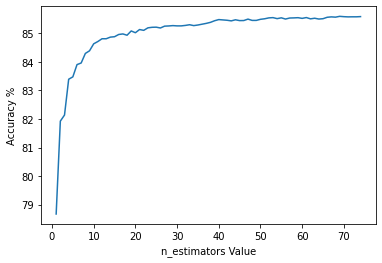

In [85]:
from sklearn.ensemble import RandomForestClassifier 
score_list=[]
for each in range(1,75):
    rf2=RandomForestClassifier(n_estimators=each, random_state=42)
    rf2.fit(X_train, y_train)
    score_list.append(100*rf2.score(X_test, y_test))
    print("n_estimators=", each, "--> Accuracy:", 100*rf2.score(X_test, y_test), "%")

plt.plot([*range(1,75)], score_list)
plt.xlabel("n_estimators Value")
plt.ylabel("Accuracy %")
plt.show()

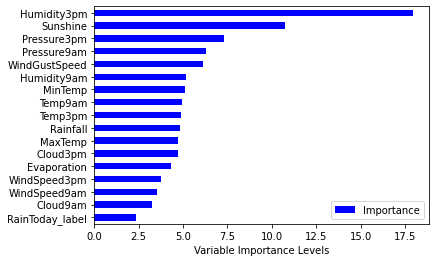

In [103]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "b")

plt.xlabel("Variable Importance Levels");

In [87]:
y_pred = rf2.predict(X_test)
rf_finalscore=accuracy_score(y_test, y_pred)
rf_finalscore

0.8557899472026896

## 6-Catboost

In [90]:
!pip install catboost

In [91]:
from catboost import CatBoostClassifier, Pool

In [92]:
cat = CatBoostClassifier()

In [94]:
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

Learning rate set to 0.073152
0:	learn: 0.6365425	total: 22.9ms	remaining: 22.9s
1:	learn: 0.5887404	total: 46.2ms	remaining: 23.1s
2:	learn: 0.5487274	total: 69ms	remaining: 22.9s
3:	learn: 0.5181795	total: 93.3ms	remaining: 23.2s
4:	learn: 0.4911081	total: 115ms	remaining: 22.9s
5:	learn: 0.4678756	total: 136ms	remaining: 22.6s
6:	learn: 0.4520234	total: 160ms	remaining: 22.6s
7:	learn: 0.4364121	total: 183ms	remaining: 22.6s
8:	learn: 0.4237029	total: 209ms	remaining: 23s
9:	learn: 0.4130047	total: 245ms	remaining: 24.3s
10:	learn: 0.4049525	total: 297ms	remaining: 26.7s
11:	learn: 0.3966532	total: 331ms	remaining: 27.3s
12:	learn: 0.3909369	total: 370ms	remaining: 28.1s
13:	learn: 0.3860596	total: 396ms	remaining: 27.9s
14:	learn: 0.3813085	total: 422ms	remaining: 27.7s
15:	learn: 0.3773086	total: 445ms	remaining: 27.4s
16:	learn: 0.3738354	total: 468ms	remaining: 27s
17:	learn: 0.3709572	total: 491ms	remaining: 26.8s
18:	learn: 0.3683972	total: 513ms	remaining: 26.5s
19:	learn: 0.

In [98]:
cat_finalscore = accuracy_score(y_test, y_pred)
cat_finalscore

0.8599332338944528

In [96]:
c_cat=confusion_matrix(y_test,y_pred)
c_cat

array([[31192,  1628],
       [ 4288,  5129]])

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     32820
         1.0       0.76      0.54      0.63      9417

    accuracy                           0.86     42237
   macro avg       0.82      0.75      0.77     42237
weighted avg       0.85      0.86      0.85     42237



In [101]:
print(dtc_finalscore,rf_finalscore,lgbm_finalscore, gbm_finalscore, XGBoost_finalscore, cat_finalscore)

0.8401164855458484 0.8557899472026896 0.858086511826124 0.8581575395979828 0.8487581977886687 0.8599332338944528


### ----> Best Model is CatBOOST <----

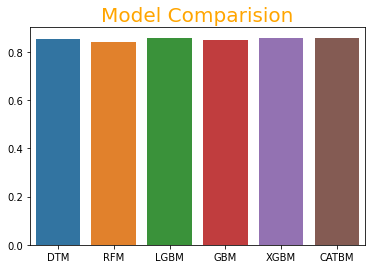

In [102]:
idx = ["DTM","RFM","LGBM", "GBM", "XGBM", "CATBM"]
regressions = [rf_finalscore,dtc_finalscore, gbm_finalscore, XGBoost_finalscore, lgbm_finalscore,cat_finalscore,]

plt.figure(figsize=(6,4))
sns.barplot(x=idx,y=regressions)
plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);